In [72]:
!pip install neo4j
!pip install pandas
!pip install graphdatascience
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [73]:
import pandas as pd
import neo4j as neo
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
from graphdatascience import GraphDataScience
from sklearn.preprocessing import StandardScaler

## CONNECTION WITH NEO4J DATABASE

In [74]:
host = "bolt://localhost:7689"
user = "neo4j"
password= "123456789"

# host = "bolt://44.203.23.150"
# user = "neo4j"
# password = "tanks-syntax-streak"

gds = GraphDataScience(host, auth=(user, password))

print(gds.version())

2.12.0


#  Variables to initialise

In [75]:
field_computer_science = ["Information Systems","Computer Software","Data Format",
"Artificial Intelligence and Image Processing","Computation Theory and Mathematics","Other Information and Computing Sciences",
"Library and Information Studies","Computer Hardware"]
field_computer_science

['Information Systems',
 'Computer Software',
 'Data Format',
 'Artificial Intelligence and Image Processing',
 'Computation Theory and Mathematics',
 'Other Information and Computing Sciences',
 'Library and Information Studies',
 'Computer Hardware']

In [76]:
researcher_1="Jean-Henry Morin"
researcher_2="Gilles Falquet"
researcher_list=[researcher_1,researcher_2]

In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### METADATA OF THE GRAPH

In [78]:
gds.run_cypher("CALL db.schema.nodeTypeProperties()")

,nodeType,nodeLabels,propertyName,propertyTypes,mandatory
0,:`Field`,[Field],domain,[String],True
1,:`Researcher`,[Researcher],researcher_id,[String],True
2,:`Researcher`,[Researcher],full_name,[String],True
3,:`Researcher`,[Researcher],first_name,"[String, Double]",True
4,:`Researcher`,[Researcher],last_name,[String],True
5,:`Researcher`,[Researcher],total_number_of_publications,[Long],True


In [79]:
#Some metadata
gds.run_cypher("CALL db.schema.relTypeProperties()")

,relType,propertyName,propertyTypes,mandatory
0,:`CO_AUTHORS`,number_of_time,[Long],True
1,:`CO_AUTHORS`,last_year_collaboration,[Long],True
2,:`WORKS_IN`,number_of_publication,[Long],True
3,:`WORKS_IN`,weight_field,[Double],True


### GET THE SCIENTISTS WITH THE MOST PUBLICATIONS IN THE DB

In [80]:
#Get the scientits in unige with the most publications

result_total_publications= gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name as name, r.researcher_id as researcher_id, r.total_number_of_publications as total, \
collect (f.domain) ORDER BY r.total_number_of_publications DESC LIMIT 80")
result_total_publications.head(20)

,name,researcher_id,total,collect (f.domain)
0,K. Cenzual,ur.014174005714.85,7729,"[Biochemistry and Cell Biology, Physical Chemistry (incl. Structural), Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Paediatrics and Reproductive Medicine, Geology, Astronomical and Space Sciences, Artificial Intelligence and Image Processing, Other Chemical Sciences, Inorganic Chemistry, Materials Engineering, Geochemistry, Condensed Matter Physics, Organic Chemistry, Resources Engineering and Extractive Metallurgy]"
1,X. Wu,ur.01300274247.21,2120,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Applied Economics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Electrical and Electronic Engineering, Biomedical Engineering, Numerical and Computational Mathematics, Optical Physics, Condensed Matter Physics, Chemical Engineering, Resources Engineering and Extractive Metallurgy]"
2,D. d'Enterria,ur.016312771362.21,1864,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Condensed Matter Physics, Resources Engineering and Extractive Metallurgy]"
3,M. Pierini,ur.014032004363.32,1699,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Biomedical Engineering, Condensed Matter Physics, Chemical Engineering, Resources Engineering and Extractive Metallurgy]"
4,M. Elsing,ur.015440532053.50,1627,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Electrical and Electronic Engineering, Biomedical Engineering, Optical Physics, Condensed Matter Physics]"
5,L. Malgeri,ur.01201573234.20,1594,"[Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Materials Engineering, Optical Physics, Condensed Matter Physics, Resources Engineering and Extractive Metallurgy]"
6,T. Wengler,ur.010765257600.38,1377,"[Physical Chemistry (incl. Structural), Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Materials Engineering, Biomedical Engineering, Applied Mathematics, Optical Physics, Chemical Engineering, Manufacturing Engineering]"
7,M. Lassnig,ur.013744472523.62,1367,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Interdisciplinary Engineering, Computer Software, Electrical and Electronic Engineering, Sociology, Optical Physics, Condensed Matter Physics, Computation Theory and Mathematics]"
8,A. Pfeiffer,ur.011256127372.09,1334,"[Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Statistics, Astronomical and Space Sciences, Quantum Physics, Artificial Intelligence and Image Processing, Mathematical Physics, Pure Mathematics, Interdisciplinary Engineering, Computer Software, Mate

In [81]:
result_total_publications_map = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name, \
r.total_number_of_publications as total, collect({number:w.number_of_publication,field:f.domain}) as field_number ORDER BY total DESC LIMIT 10")
result_total_publications_map.head()

,r.full_name,total,field_number
0,K. Cenzual,7729,"[{'field': 'Biochemistry and Cell Biology', 'number': 66}, {'field': 'Physical Chemistry (incl. Structural)', 'number': 950}, {'field': 'Information Systems', 'number': 67}, {'field': 'Other Physical Sciences', 'number': 1}, {'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics', 'number': 2495}, {'field': 'Paediatrics and Reproductive Medicine', 'number': 1}, {'field': 'Geology', 'number': 236}, {'field': 'Astronomical and Space Sciences', 'number': 393}, {'field': 'Artificial Intelligence and Image Processing', 'number': 1}, {'field': 'Other Chemical Sciences', 'number': 1}, {'field': 'Inorganic Chemistry', 'number': 3432}, {'field': 'Materials Engineering', 'number': 70}, {'field': 'Geochemistry', 'number': 3}, {'field': 'Condensed Matter Physics', 'number': 6}, {'field': 'Organic Chemistry', 'number': 1}, {'field': 'Resources Engineering and Extractive Metallurgy', 'number': 6}]"
1,X. Wu,2120,"[{'field': 'Other Physical Sciences', 'number': 480}, {'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics', 'number': 814}, {'field': 'Applied Economics', 'number': 1}, {'field': 'Statistics', 'number': 35}, {'field': 'Astronomical and Space Sciences', 'number': 172}, {'field': 'Quantum Physics', 'number': 252}, {'field': 'Artificial Intelligence and Image Processing', 'number': 1}, {'field': 'Mathematical Physics', 'number': 50}, {'field': 'Interdisciplinary Engineering', 'number': 5}, {'field': 'Electrical and Electronic Engineering', 'number': 4}, {'field': 'Biomedical Engineering', 'number': 1}, {'field': 'Numerical and Computational Mathematics', 'number': 1}, {'field': 'Optical Physics', 'number': 1}, {'field': 'Condensed Matter Physics', 'number': 4}, {'field': 'Chemical Engineering', 'number': 1}, {'field': 'Resources Engineering and Extractive Metallurgy', 'number': 2}]"
2,D. d'Enterria,1864,"[{'field': 'Other Physical Sciences', 'number': 142}, {'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics', 'number': 934}, {'field': 'Statistics', 'number': 52}, {'field': 'Astronomical and Space Sciences', 'number': 125}, {'field': 'Quantum Physics', 'number': 271}, {'field': 'Artificial Intelligence and Image Processing', 'number': 1}, {'field': 'Mathematical Physics', 'number': 199}, {'field': 'Pure Mathematics', 'number': 5}, {'field': 'Interdisciplinary Engineering', 'number': 2}, {'field': 'Materials Engineering', 'number': 3}, {'field': 'Condensed Matter Physics', 'number': 1}, {'field': 'Resources Engineering and Extractive Metallurgy', 'number': 1}]"
3,M. Pierini,1699,"[{'field': 'Information Systems', 'number': 1}, {'field': 'Other Physical Sciences', 'number': 113}, {'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics', 'number': 832}, {'field': 'Statistics', 'number': 51}, {'field': 'Astronomical and Space Sciences', 'number': 112}, {'field': 'Quantum Physics', 'number': 258}, {'field': 'Artificial Intelligence and Image Processing', 'number': 13}, {'field': 'Mathematical Physics', 'number': 177}, {'field': 'Pure Mathematics', 'number': 5}, {'field': 'Interdisciplinary Engineering', 'number': 2}, {'field': 'Materials Engineering', 'number': 3}, {'field': 'Biomedical Engineering', 'number': 1}, {'field': 'Condensed Matter Physics', 'number': 4}, {'field': 'Chemical Engineering', 'number': 1}, {'field': 'Resources Engineering and Extractive Metallurgy', 'number': 1}]"
4,M. Elsing,1627,"[{'field': 'Other Physical Sciences', 'number': 506}, {'field': 'Atomic, Molecular, Nuclear, Particle and Plasma Physics', 'number': 650}, {'field': 'Statistics', 'number': 22}, {'field': 'Astronomical and Space Sciences', 'number': 102}, {'field': 'Quantum Physics', 'number': 177}, {'field': 'Artificial Intelligence and Image Processing', 'number': 1}, {'field': 'Mathematical Physics', 'number': 115}, {'field': 'Interdisciplinary Engineering', 'number': 1}, {'field': 'Electrical and Electronic Engineering', 'number': 1}, {'field': 'Biome

/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_66988/2333213598.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g = g.set_xticklabels(g.get_xticklabels(), rotation=90)


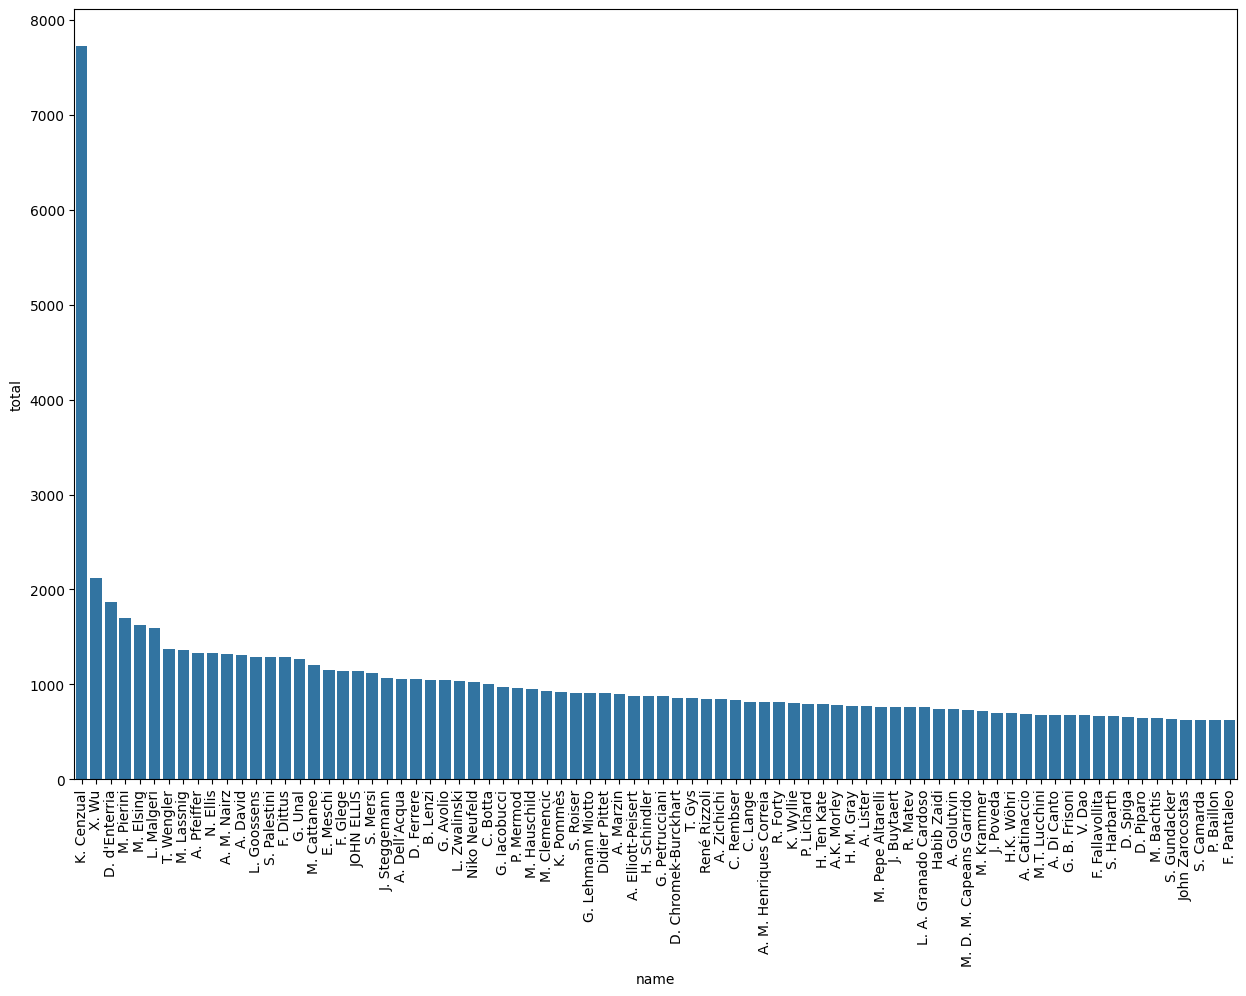

In [82]:
g = sns.barplot(x=result_total_publications["name"], y=result_total_publications["total"])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

## WHO IS K.CENZUAL????
When the data is weird like this, normally you investigate.

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [84]:
CENZUAL = gds.run_cypher("MATCH (n:Researcher{researcher_id:'ur.014174005714.85'})-[:WORKS_IN]-(f:Field) return n.full_name, n.last_name, n.total_number_of_publications, collect(f.domain)")
CENZUAL

,n.full_name,n.last_name,n.total_number_of_publications,collect(f.domain)
0,K. Cenzual,Cenzual,7729,"[Biochemistry and Cell Biology, Physical Chemistry (incl. Structural), Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Paediatrics and Reproductive Medicine, Geology, Astronomical and Space Sciences, Artificial Intelligence and Image Processing, Other Chemical Sciences, Inorganic Chemistry, Materials Engineering, Geochemistry, Condensed Matter Physics, Organic Chemistry, Resources Engineering and Extractive Metallurgy]"


### Number of publication in an domain of research

In [85]:
#Get the field which has the most publications
result_domain_count = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN f.domain as domain, count(*) as number_time ORDER BY  number_time DESC LIMIT 40")
result_domain_count.head()

,domain,number_time
0,Clinical Sciences,15891
1,Public Health and Health Services,13093
2,"Atomic, Molecular, Nuclear, Particle and Plasma Physics",11692
3,Other Physical Sciences,11401
4,Biochemistry and Cell Biology,6294


/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_66988/2481717666.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g =g.set_xticklabels(g.get_xticklabels(), rotation=90)


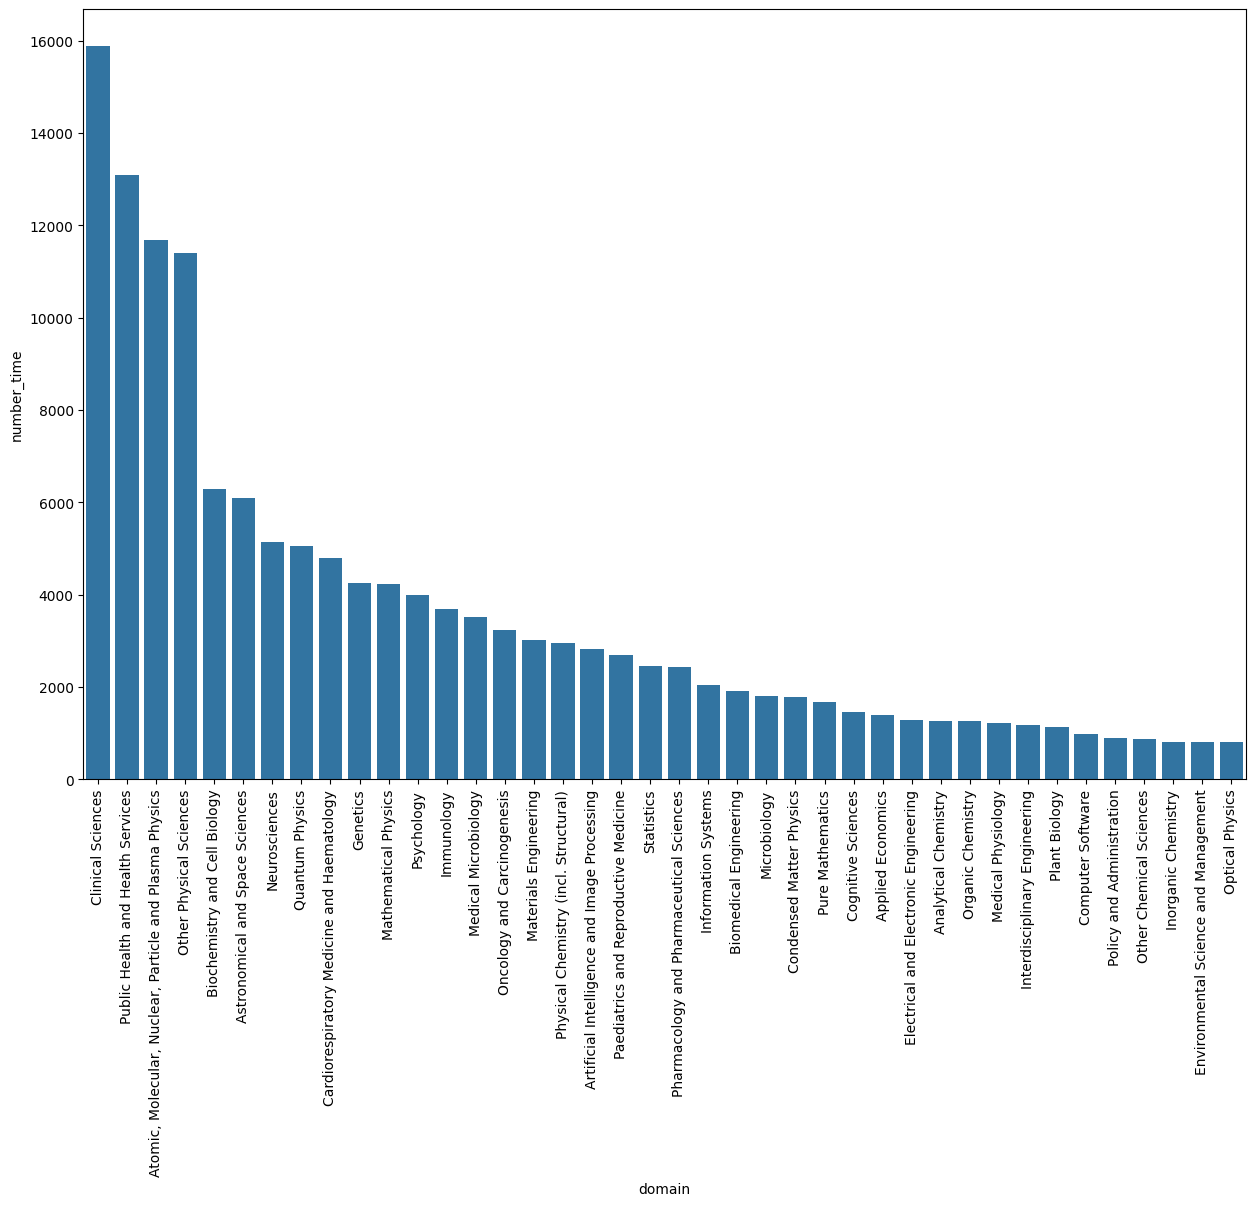

In [86]:
g = sns.barplot(x=result_domain_count["domain"], y=result_domain_count["number_time"])
g =g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Who published in the most area of research

In [87]:
#Get the researcher that works in several research fields.
result_field = gds.run_cypher("MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) RETURN r.full_name as name, r.researcher_id as researcher_id, count(*) as fields ORDER BY  fields DESC LIMIT 30")
result_field.head(10)

,name,researcher_id,fields
0,BASTIEN CHOPARD,ur.016275067565.80,46
1,S Rudaz,ur.0605706427.85,37
2,A. Zichichi,ur.012521521573.71,36
3,Jean-Charles Sanchez,ur.01326260071.22,32
4,François R. Herrmann,ur.01206175026.02,31
5,Bernice S. Elger,ur.01306617426.43,31
6,Vera I. Slaveykova,ur.01304222144.30,30
7,Martin K. Patel,ur.01205731332.31,30
8,Jean-Luc Wolfender,ur.01001572401.77,29
9,Markus Stoffel,ur.0753645627.41,28


/var/folders/wc/4r8t_c91523cgt8st98mw_ph0000gn/T/ipykernel_66988/950732247.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g = g.set_xticklabels(g.get_xticklabels(), rotation=90)


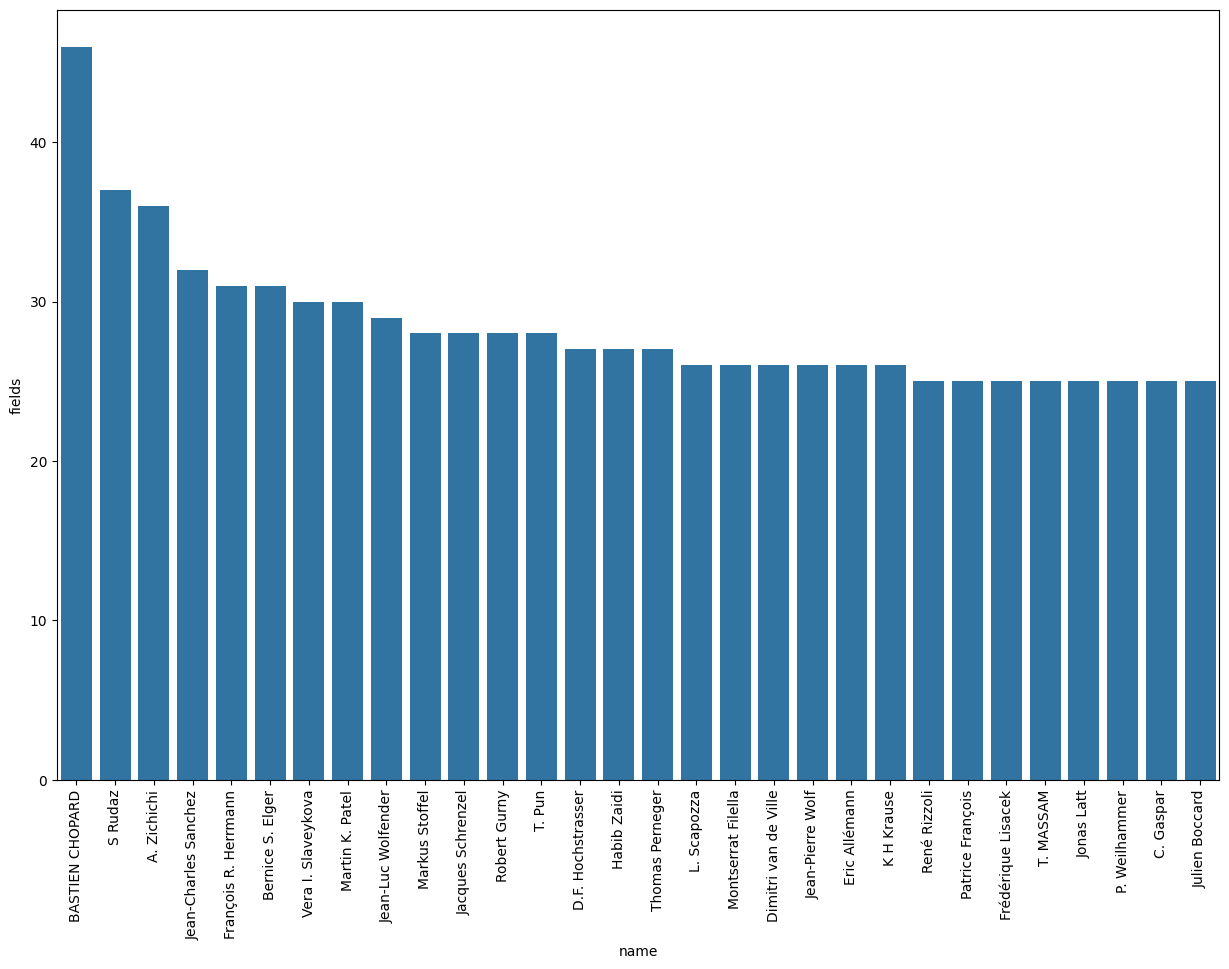

In [88]:
g = sns.barplot(x=result_field["name"], y=result_field["fields"])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [89]:
choppard = gds.run_cypher("MATCH (r:Researcher{researcher_id:'ur.016275067565.80'})-[w:WORKS_IN]-(f:Field) RETURN r.full_name as full_name, count(*) as total_fields, collect(f.domain) as domain")

print(choppard.domain)

0    [Biochemistry and Cell Biology, Psychology, Genetics, Physical Chemistry (incl. Structural), Information Systems, Applied Economics, Banking, Finance and Investment, Statistics, Econometrics, Clinical Sciences, Geology, Quantum Physics, Artificial Intelligence and Image Processing, Neurosciences, Other Chemical Sciences, Inorganic Chemistry, Mathematical Physics, Cognitive Sciences, Pure Mathematics, Interdisciplinary Engineering, Cardiorespiratory Medicine and Haematology, Atmospheric Sciences, Theoretical and Computational Chemistry, Computer Software, Data Format, Materials Engineering, Human Movement and Sports Science, Medical Physiology, Biomedical Engineering, Civil Engineering, Zoology, Applied Mathematics, Numerical and Computational Mathematics, Mechanical Engineering, Communications Technologies, Optical Physics, Computation Theory and Mathematics, Distributed Computing, Physical Geography and Environmental Geoscience, Geomatic Engineering, Organic Chemistry, Geophysics

## Computer science

## Scientists with the most publications in Computer Science (areas)

In [90]:
#Get the researcher with the most publications in Computer Science 

query_number_publications_in_computer_science_person =f"MATCH(r:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} \
    and w.weight_field > 1 return distinct r.full_name as name,r.researcher_id as researcher_id, r.total_number_of_publications as total_publication ORDER by r.total_number_of_publications DESC"

result_number_publication_person_computer_science = gds.run_cypher(query_number_publications_in_computer_science_person)
result_number_publication_person_computer_science.head(20)

,name,researcher_id,total_publication
0,Habib Zaidi,ur.01300453230.34,741
1,Nadia Magnenat-Thalmann,ur.0704711431.38,533
2,Dimitri van de Ville,ur.01041204034.82,418
3,BASTIEN CHOPARD,ur.016275067565.80,339
4,Amos Bairoch,ur.01076543625.00,233
5,Osman Ratib,ur.0617321230.19,230
6,Henning Müller,ur.07552063233.67,218
7,T. Pun,ur.01212142027.87,212
8,Christian Lovis,ur.01133331655.52,196
9,Frédérique Lisacek,ur.0674012177.79,195


In [91]:
query_informatique_fields = (f"MATCH(n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain \
     IN {field_computer_science}  RETURN DISTINCT n.full_name, n.researcher_id as researcher, f.domain, w.weight_field ORDER by w.weight_field DESC")

result_informatique_field = gds.run_cypher(query_informatique_fields)
result_informatique_field.head(10)

,n.full_name,researcher,f.domain,w.weight_field
0,Henning Müller,ur.07552063233.67,Artificial Intelligence and Image Processing,11.605505
1,Nadia Magnenat-Thalmann,ur.0704711431.38,Artificial Intelligence and Image Processing,11.227017
2,T. Pun,ur.01212142027.87,Artificial Intelligence and Image Processing,10.566038
3,Nadia Magnenat Thalmann,ur.013317560667.45,Artificial Intelligence and Image Processing,7.442748
4,Stéphane Marchand-Maillet,ur.016472056171.12,Artificial Intelligence and Image Processing,7.264368
5,Michel Leonard,ur.01066422007.20,Information Systems,7.183673
6,Habib Zaidi,ur.01300453230.34,Artificial Intelligence and Image Processing,6.558704
7,P. Volino,ur.07527316741.46,Artificial Intelligence and Image Processing,6.176471
8,M. Hilario,ur.010323216605.25,Artificial Intelligence and Image Processing,6.139535
9,Patrick Ruch,ur.016176475704.89,Artificial Intelligence and Image Processing,6.055046


In [92]:
#Get the researcher that works in several research fields.
result_field = gds.run_cypher(f"MATCH (r:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain \
IN {field_computer_science} and w.weight_field > 5 with r,f,w MATCH (r)-[ww:WORKS_IN]-(ff:Field)  \
RETURN r.full_name,r.researcher_id as researcher_id, r.total_number_of_publications as total_publication,max(w.weight_field) as max_weight_field, \
collect( DISTINCT f.domain) as domain_computer, \
count(ff.domain) as count_all_domain, collect(ff.domain) as all_domain  \
ORDER BY total_publication DESC ")
result_field.head(20)

,r.full_name,researcher_id,total_publication,max_weight_field,domain_computer,count_all_domain,all_domain
0,Habib Zaidi,ur.01300453230.34,741,6.558704,[Artificial Intelligence and Image Processing],27,"[Biochemistry and Cell Biology, Public Health and Health Services, Psychology, Information Systems, Other Physical Sciences, Atomic, Molecular, Nuclear, Particle and Plasma Physics, Paediatrics and Reproductive Medicine, Statistics, Clinical Sciences, Astronomical and Space Sciences, Artificial Intelligence and Image Processing, Neurosciences, Cognitive Sciences, Cardiorespiratory Medicine and Haematology, Oncology and Carcinogenesis, Theoretical and Computational Chemistry, Computer Software, Materials Engineering, Human Movement and Sports Science, Medical Physiology, Electrical and Electronic Engineering, Biomedical Engineering, Pharmacology and Pharmaceutical Sciences, Numerical and Computational Mathematics, Optical Physics, Computation Theory and Mathematics, Physiology]"
1,Nadia Magnenat-Thalmann,ur.0704711431.38,533,11.227017,[Artificial Intelligence and Image Processing],22,"[Psychology, Information Systems, Statistics, Clinical Sciences, Artificial Intelligence and Image Processing, Neurosciences, Specialist Studies In Education, Cognitive Sciences, Computer Software, Materials Engineering, Human Movement and Sports Science, Electrical and Electronic Engineering, Biomedical Engineering, Numerical and Computational Mathematics, Mechanical Engineering, Cultural Studies, Computation Theory and Mathematics, Curriculum and Pedagogy, Manufacturing Engineering, Design Practice and Management, Curatorial and Related Studies, Architecture]"
2,Henning Müller,ur.07552063233.67,218,11.605505,[Artificial Intelligence and Image Processing],23,"[Biochemistry and Cell Biology, Public Health and Health Services, Psychology, Information Systems, Statistics, Clinical Sciences, Artificial Intelligence and Image Processing, Neurosciences, Other Biological Sciences, Cognitive Sciences, Cardiorespiratory Medicine and Haematology, Oncology and Carcinogenesis, Computer Software, Data Format, Human Movement and Sports Science, Electrical and Electronic Engineering, Biomedical Engineering, Analytical Chemistry, Communications Technologies, Linguistics, Computation Theory and Mathematics, Distributed Computing, Medical Biotechnology]"
3,T. Pun,ur.01212142027.87,212,10.566038,[Artificial Intelligence and Image Processing],28,"[Psychology, Dentistry, Information Systems, Other Physical Sciences, Applied Economics, Statistics, Clinical Sciences, Artificial Intelligence and Image Processing, Neurosciences, Other Biological Sciences, Environmental Science and Management, Cognitive Sciences, Pure Mathematics, Cardiorespiratory Medicine and Haematology, Computer Software, Data Format, Medical Biochemistry and Metabolomics, Electrical and Electronic Engineering, Biomedical Engineering, Civil Engineering, Cultural Studies, Communications Technologies, Optical Physics, Computation Theory and Mathematics, Distributed Computing, Medical Biotechnology, Film, Television and Digital Media, Design Practice and Management]"
4,Stéphane Marchand-Maillet,ur.016472056171.12,174,7.264368,"[Artificial Intelligence and Image Processing, Information Systems]",32,"[Public Health and Health Services, Psychology, Information Systems, Ecology, Statistics, Econometrics, Artificial Intelligence and Image Processing, Environmental Science and Management, Pure Mathematics, Computer Software, Data Format, Electrical and Electronic Engineering, Computation Theory and Mathematics, Geomatic Engineering, Archaeology, Architecture, Public Health and Health Services, Psychology, Information Systems, Ecology, Statistics, Econometrics, Artificial Intelligence and Image Processing, Environmental Science and Management, Pure Mathematics, Computer Software, Data Format, Electrical and Electronic Engineering, Computation Theory and Mathematics, Geomatic Engineering, Archaeology, Architecture

## Start of the Recommender 

## Start for the graph algorithms to skip if these relationships are already in the DB

In [93]:
graph_name = "co_authors_graph"

In [94]:
result = gds.run_cypher("""CALL gds.graph.drop($params,false) YIELD graphName""",params={"params":graph_name}) # drop the graph and do not raise the error if the graph is not found.
result = gds.run_cypher("""CALL gds.graph.project($params, 'Researcher', 'CO_AUTHORS')""",params={"params":graph_name})
result

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Researcher': {'label': 'Researcher', 'properties': {}}}","{'CO_AUTHORS': {'aggregation': 'DEFAULT', 'orientation': 'NATURAL', 'indexInverse': False, 'properties': {}, 'type': 'CO_AUTHORS'}}",co_authors_graph,64849,697374,235


## Centrality
Utiliser les algorithmes de centralités pour calculer les chercheurs qui ont plus de connection (plus important) que d'autres. Ceci pourrait être utiliser plus tard pour classifier les reviewers.

### Calculate the Degree Centrality

In [95]:
#Stream the result for the degree centrality 

result = gds.run_cypher(
f" CALL gds.degree.stream($params) YIELD nodeId, score RETURN gds.util.asNode(nodeId).full_name AS name, score ORDER BY score DESC, name ASC", params={"params":graph_name}
)
result.head()

,name,score
0,G. Avolio,1438.0
1,M. Elsing,1302.0
2,F. Dittus,1247.0
3,L.S. Ancu,1240.0
4,N. Ellis,1214.0


In [96]:
#write the data in the graph
result = gds.run_cypher(f"CALL gds.degree.write($params_graph, {{writeProperty: 'degree_centrality'}})",params={"params_graph":graph_name})
result


,nodePropertiesWritten,writeMillis,centralityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
0,64849,219,"{'min': 0.0, 'max': 1438.0078124999998, 'p90': 19.00011444091797, 'p999': 558.0038986206055, 'p99': 152.00096893310547, 'p50': 3.0000076293945312, 'p75': 8.000053405761719, 'p95': 40.00023651123047, 'mean': 10.75384266716316}",79,0,0,"{'writeProperty': 'degree_centrality', 'orientation': 'NATURAL', 'jobId': '4f47c8c1-f3ae-445d-af76-884eaa440798', 'logProgress': True, 'nodeLabels': ['*'], 'relationshipTypes': ['*'], 'concurrency': 4, 'sudo': False, 'writeToResultStore': False, 'writeConcurrency': 4}"


### Difference between centrality and betweeeness measures

Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection.

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

In [97]:
# #difficult to run on AURO DS
# result_betweeness = gds.run_cypher(
# f" CALL gds.betweenness.write($params_graph, {{writeProperty: 'betweeness'}})",params={"params_graph":graph_name})
# result_betweeness


### Calculate PageRank
The PageRank algorithm measures the importance of each node within the graph, based on the number 
incoming relationships and the importance of the corresponding source nodes. 
The underlying assumption roughly speaking is that a page is only as important as the pages that link to it.


In [98]:
result_page_rank_stream = gds.run_cypher(
f" CALL gds.pageRank.stream($params)\
YIELD nodeId, score \
RETURN gds.util.asNode(nodeId).full_name AS name, score \
ORDER BY score DESC, name ASC" , params={"params":graph_name}
)
result_page_rank_stream.head(10)

,name,score
0,[Authorinst]The CMS Collaboration,66.912424
1,L. Zwalinski,52.810444
2,X. Wu,47.408888
3,T. Wengler,34.155657
4,Stylianos E. Antonarakis,31.788445
5,F. Zimmermann,30.998080
6,K. Wyllie,30.297554
7,Stefan Matile,29.434901
8,T. Virdee,29.379169
9,P. Morel,29.030797


In [99]:
result_page_rank_write = gds.run_cypher(
f" CALL gds.pageRank.write($params_graph, {{writeProperty: 'pageRank',scaler:'L1NORM'}})",params={"params_graph":graph_name})
result_page_rank_write

,writeMillis,nodePropertiesWritten,ranIterations,didConverge,centralityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
0,121,64849,20,False,"{'min': 4.246103344485164e-06, 'max': 0.00189412385225296, 'p90': 2.9489485314115882e-05, 'p999': 0.00041236539254896343, 'p99': 0.0001391796104144305, 'p50': 7.253780495375395e-06, 'p75': 1.410508411936462e-05, 'p95': 4.866320523433387e-05, 'mean': 1.542043051883027e-05}",30,0,80,"{'writeProperty': 'pageRank', 'jobId': '20228895-fa1c-4def-a9f9-444f5cc4d2b0', 'scaler': 'L1NORM', 'sourceNodes': [], 'sudo': False, 'maxIterations': 20, 'dampingFactor': 0.85, 'writeToResultStore': False, 'writeConcurrency': 4, 'logProgress': True, 'nodeLabels': ['*'], 'concurrency': 4, 'relationshipTypes': ['*'], 'tolerance': 1e-07}"


## Query the database for pageRank and Degree centrality

In [100]:
betweeness_page_rank_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and \
    w.weight_field>1 return DISTINCT n.full_name, n.researcher_id, n.pageRank as pageRank,n.degree_centrality as centrality_score ORDER by pageRank DESC")
betweeness_page_rank_df

#centrality_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and w.weight_field>3 return DISTINCT n.full_name,  n.researcher_id, n.degree_centrality as centrality_score ORDER by centrality_score  DESC")

,n.full_name,n.researcher_id,pageRank,centrality_score
0,Dimitri van de Ville,ur.01041204034.82,0.000401,58.0
1,Osman Ratib,ur.0617321230.19,0.000398,72.0
2,A. Geissbuhler,ur.0600360343.20,0.000396,41.0
3,Christian Lovis,ur.01133331655.52,0.000338,51.0
4,Cathy Wu,ur.010260073507.82,0.000308,54.0
...,...,...,...,...
841,Erika L.C. King,ur.012474516035.02,0.000004,0.0
842,Shalom Eliahou,ur.011231372723.87,0.000004,2.0
843,Nguyen Vi Cao,ur.07403716505.80,0.000004,6.0
844,Marc L. Corliss,ur.015455605067.55,0.000004,0.0


In [101]:
# scaler = StandardScaler()
# betweeness_page_rank_df.iloc[:,2:] = scaler.fit_transform(betweeness_page_rank_df.iloc[:,2:].to_numpy())
# betweeness_page_rank_df

In [102]:
#betweeness_page_rank_df.iloc[:,2:]= betweeness_page_rank_df.iloc[:,2:].transform(lambda x: x / abs(x).max())

In [103]:
betweeness_page_rank_df.fillna(0,inplace=True)
betweeness_page_rank_df_graph = betweeness_page_rank_df.set_index("n.full_name")

In [104]:
betweeness_page_rank_df_graph.sort_values(by="centrality_score",ascending=False,inplace=True)

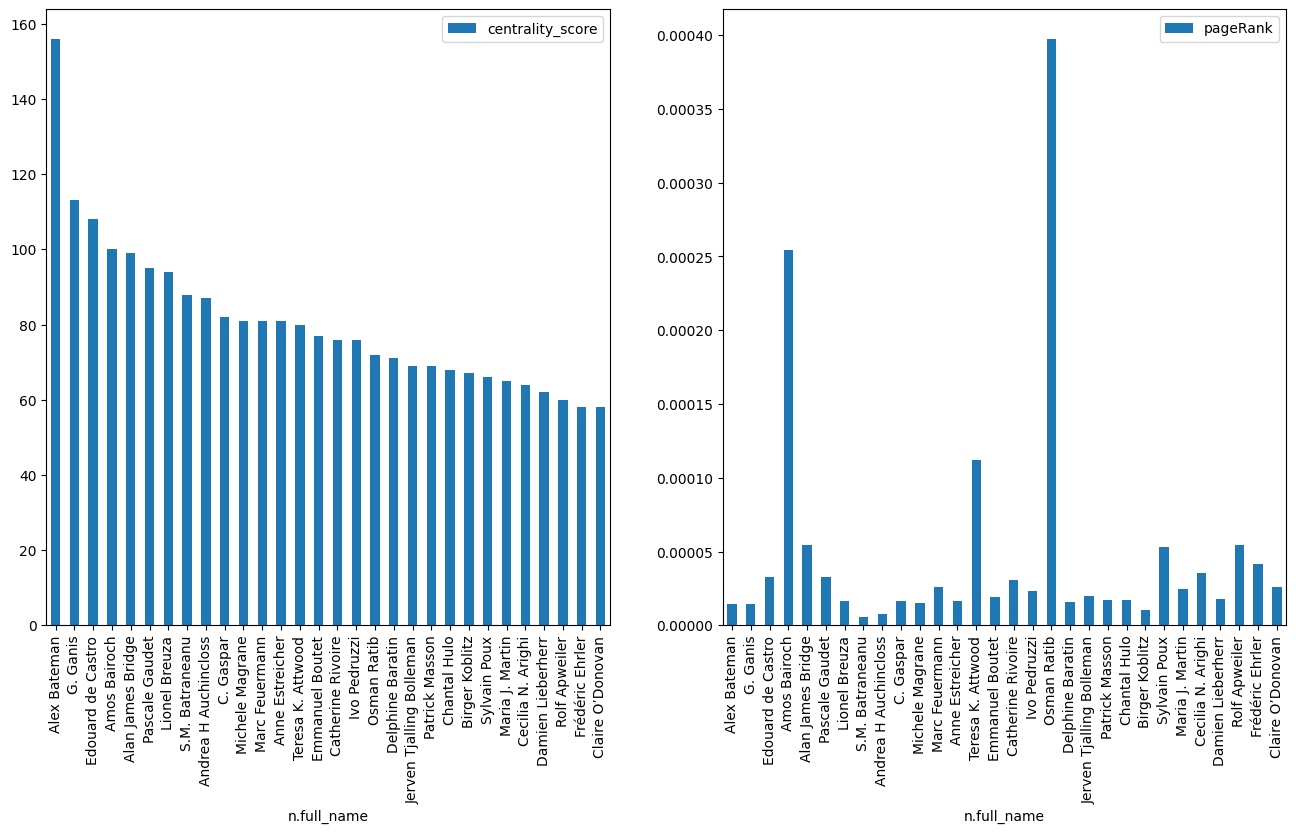

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
betweeness_page_rank_df_graph[["centrality_score"]].head(30).plot(kind="bar", ax=ax1)
betweeness_page_rank_df_graph[["pageRank"]].head(30).plot(kind="bar",ax=ax2)
a = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

The Degree Centrality algorithm counts the number of incoming and outgoing relationships from a node. It is used to find popular nodes in a graph.

PageRank is a variant of the Eigenvector Centrality algorithm which measures the transitive (or directional) influence of nodes. Relationships to high-scoring nodes contribute more to the score of a node than connections to low-scoring nodes. A high score means that a node is connected to other nodes that have high scores.

On peut remarquer que les mesures ne donnent pas les mêmes résultats. La question est de savoir quel algorithmes choisir, et cela se fait en fonction de ce que l'on veut faire, et des hypotheses de départ.
Par exemple, si on recherche un scientifique qui est un hub on va choisir Betweenness Centrality comme algorithme.
Entre ces deux exemples, PageRank et centrality, on voit que certains scientifiques on un score PageRank plus haut que leur score de centrality, ou plus bas. Cela pourrait être du au fait que les personnes avec qui ces scientifiques collaborent sont des personnes qui sont "importante" ou peu "importante". Un·e scientifique qui collabore surtout avec des étudiants en Doctorat va avoir un PageRank score plus bas que quelqu'un qui collabore surtout avec des scientifiques de renoms.

In [106]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Jean-Henry")]


,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Jean-Henry Morin,ur.0631021307.20,0.000029,2.0


In [107]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Hélène")]

,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Hélène de Ribaupierre,ur.01276566337.02,0.000004,1.0


In [108]:
betweeness_page_rank_df_graph[betweeness_page_rank_df_graph.index.str.startswith("Nadia Magnenat-Thalmann")]

,n.researcher_id,pageRank,centrality_score
n.full_name,,,
Nadia Magnenat-Thalmann,ur.0704711431.38,0.000215,23.0


## COMMUNITY

The Label Propagation algorithm (LPA) is a fast algorithm for finding communities in a graph. It detects these communities using network structure alone as its guide, and doesn’t require a pre-defined objective function or prior information about the communities.
LPA works by propagating labels throughout the network and forming communities based on this process of label propagation.
The intuition behind the algorithm is that a single label can quickly become dominant in a densely connected group of nodes, but will have trouble crossing a sparsely connected region. Labels will get trapped inside a densely connected group of nodes, and those nodes that end up with the same label when the algorithms finish can be considered part of the same community.

The Louvain method is an algorithm to detect communities in large networks. It maximizes a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities. This means evaluating how much more densely connected the nodes within a community are, compared to how connected they would be in a random network. (source neo4j)

In [109]:
graph_name_2 = "co_authors_graph_weight"
result = gds.run_cypher("""CALL gds.graph.drop($params,false) YIELD graphName""",params={"params":graph_name_2}) # drop the graph and do not raise the error if the graph is not found.
result = gds.run_cypher("""CALL gds.graph.project('co_authors_graph_weight', 'Researcher', {CO_AUTHORS:{properties:"number_of_time"}})""",params={"params":graph_name_2})
result

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'Researcher': {'label': 'Researcher', 'properties': {}}}","{'CO_AUTHORS': {'aggregation': 'DEFAULT', 'orientation': 'NATURAL', 'indexInverse': False, 'properties': {'number_of_time': {'aggregation': 'DEFAULT', 'property': 'number_of_time', 'defaultValue': None}}, 'type': 'CO_AUTHORS'}}",co_authors_graph_weight,64849,697374,204


In [124]:
#LabelPropation with weight
gds.run_cypher("""CALL gds.labelPropagation.stats($graph_name,{maxIterations:1000})
YIELD communityCount, ranIterations, didConverge""",params={"graph_name":graph_name_2})

,communityCount,ranIterations,didConverge
0,13263,1000,False


In [125]:
#labelPropagation without weight
gds.run_cypher("""CALL gds.labelPropagation.stats($graph_name,{maxIterations:22})
YIELD communityCount, ranIterations, didConverge""",params={"graph_name":graph_name})


,communityCount,ranIterations,didConverge
0,13273,22,False


In [126]:
gds.run_cypher("""CALL gds.labelPropagation.stream($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:20})
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).full_name AS Name, Community
ORDER BY Community, Name""",params={"graph_name":graph_name_2})

,Name,Community
0,Carl Bader,12
1,Georg Arx,19
2,Dragana Djurdjevic,30
3,C. Smith,37
4,D. H. Dunham,37
...,...,...
64844,G.D. Appiah,64844
64845,J.M. Kipela,64844
64846,M. Cole,64845
64847,Mathieu Grobéty,64846


In [131]:
#Louvain with weight
gds.run_cypher("""
CALL gds.louvain.stats($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:100})
YIELD communityCount, modularity""",params={"graph_name":graph_name_2})

,communityCount,modularity
0,10480,0.614393


In [114]:
#Louvain without weight
gds.run_cypher("""
CALL gds.louvain.stats($graph_name)
YIELD communityCount""",params={"graph_name":graph_name_2})

,communityCount
0,10206


In [132]:
# Label propagation
gds.run_cypher("""CALL gds.labelPropagation.stream($graph_name,{relationshipWeightProperty:"number_of_time",maxIterations:20})
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).full_name AS Name, Community
ORDER BY Community, Name""",params={"graph_name":graph_name_2})

,Name,Community
0,Carl Bader,12
1,Georg Arx,19
2,Dragana Djurdjevic,30
3,C. Smith,37
4,D. H. Dunham,37
...,...,...
64844,G.D. Appiah,64844
64845,J.M. Kipela,64844
64846,M. Cole,64845
64847,Mathieu Grobéty,64846


In [133]:
#LOUVAIN

gds.run_cypher("""
CALL gds.louvain.stream($graph_name)
YIELD nodeId, communityId, intermediateCommunityIds
RETURN gds.util.asNode(nodeId).full_name AS full_name, communityId, intermediateCommunityIds
ORDER BY full_name ASC""",params={"graph_name":graph_name_2})



,full_name,communityId,intermediateCommunityIds
0,4 Gualtiero Palareti3,10488,None
1,A A Pol,7186,None
2,A ANDRIANAKI,10488,None
3,A Abad Rodriguez,58235,None
4,A Abramov,7186,None
...,...,...,...
64844,Ž. Srdić,59934,None
64845,Žiga Rotar,30224,None
64846,Åsa Holm,10488,None
64847,Åsa Rasmuson-Lestander,5263,None


In [134]:
result_write_louvain = gds.run_cypher("""
CALL gds.louvain.write($graph_name,{relationshipWeightProperty:"number_of_time", writeProperty:"louvain"})
YIELD communityCount, modularity, modularities""",params={"graph_name":graph_name_2})
result_write_louvain.head()


,communityCount,modularity,modularities
0,10563,0.658334,"[0.4949231718283211, 0.6466182079819623, 0.6578517206417553, 0.6583336127515442]"


# Begining of the query for the result

In [135]:
louvain_df = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE f.domain IN {field_computer_science} and \
w.weight_field>2 return DISTINCT n.full_name, n.louvain as louvain ORDER by louvain DESC")
louvain_df_group = (
        louvain_df.groupby("louvain")
        .agg(co_authors_list=("n.full_name", "unique"))
        .reset_index()
    )
louvain_df_group

,louvain,co_authors_list
0,1876,[Michel Lauria]
1,4007,[Gregg Vanderheiden]
2,4855,[Yves Wiaux]
3,5263,"[Jerven Tjalling Bolleman, Alan James Bridge, Nicole Redaschi, Patrick Masson, Edouard de Castro, Catherine Rivoire, Alex Bateman, Cathy Wu, Christian Sigrist, Janna Hastings, B. Roechert, Cecilia N. Arighi, Teresa K. Attwood, Sandra Orchard, Petra S. Langendijk-Genevaux]"
4,6165,"[Wolfgang Hoschek, Peter Kunszt, Heinz Stockinger, Kurt Stockinger, Ian Willers, Alexey Tselishchev, L. Cardoso, P Gayet, Flavia Donno, Sünje Dallmeier-Tiessen, Erwin Laure, Didier Buchs, Levi Lucio, Luis Pedro, Dimitri Racordon, Matteo Risoldi, M. Di Castro, A. Masi, Keith Kershaw, Giacomo Lunghi, Alexis Marechal]"
5,8003,"[Sébastien Ziegler, Pierre Leone, Francesco Luca De Angelis, Giovanna Di Marzo Serugendo, Jose Luis Fernandez-Marquez, Carlos Ballester Lafuente, Jean-Marc Seigneur, J. Rolim, Constantinos Marios Angelopoulos, Cedric Crettaz, BASTIEN CHOPARD, Nabil Abdennadher, Mohamed Ben Belgacem, Noria Foukia, Martin J. Gander]"
6,22249,[Ahmad Din]
7,24414,"[Basit Raza, Syed Saud Naqvi, Ahmad R. Shahid, Khuram Naveed]"
8,26223,"[Michel Deriaz, Dimitri Konstantas, Katarzyna Wac, Verena Kantere, Jean-Henry Morin, Naoufel Cheikhrouhou, C. Bryce, Chrislain Razafimahefa, Nicolas Zufferey, Simon Thevenin, Matteo Ciman]"
9,26732,[Lara Srivastava]


### Louvain by CO_AUTHORS

In [136]:
#return the community of two scientists
louvain_2_scientists = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_1 return DISTINCT n.full_name, n.louvain as louvain \
UNION \
MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) \
WHERE n.full_name=$researcher_2 return DISTINCT n.full_name, n.louvain as louvain",params={"researcher_1":researcher_1,"researcher_2":researcher_2})
louvain_2_scientists

,n.full_name,louvain
0,Jean-Henry Morin,26223
1,Gilles Falquet,60455


In [137]:
#return the researcher that are in the same community than both scientists
louvain_for_the_authors = gds.run_cypher(f"MATCH (n:Researcher)-[w:WORKS_IN]-(f:Field) WHERE n.louvain IN {louvain_2_scientists.louvain.tolist()} \
RETURN DISTINCT n.full_name as full_name, n.researcher_id as researcher_id, n.louvain")
louvain_for_the_authors.head(20)

,full_name,researcher_id,n.louvain
0,Christopher Laenzlinger,ur.01302630357.35,60455
1,Grigorios G. Anagnostopoulos,ur.07757411733.02,26223
2,Michel Deriaz,ur.012355324276.13,26223
3,Dimitri Konstantas,ur.0643632165.06,26223
4,Katarzyna Wac,ur.010234164203.55,26223
5,Eric Wehrli,ur.01242625577.43,60455
6,Luka Nerima,ur.010755567520.06,60455
7,Violeta Seretan,ur.015071453432.09,60455
8,Yves Scherrer,ur.013402764107.80,60455
9,Gilles Falquet,ur.016167755437.37,60455
